# Explore here

In [62]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import os 
import missingno as msno
from pickle import dump
#import statsmodels.api as sm


ds = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


1. EDA 

In [2]:
ds.shape

(41188, 21)

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
ds.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
ds.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
ds.drop(["age", "marital", "education", "contact", "month", "day_of_week", "duration", "poutcome"], axis = 1, inplace = True)
ds.head()

,job,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,services,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,services,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,admin.,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,services,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
ds = ds.drop_duplicates().reset_index(drop = True)
ds.head()

,job,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,services,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,services,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,admin.,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,services,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign,19383.0,3.275809,3.610624,1.000,1.000,2.000,4.000,56.000
pdays,19383.0,922.722644,264.433643,0.000,999.000,999.000,999.000,999.000
previous,19383.0,0.299386,0.651220,0.000,0.000,0.000,0.000,7.000
emp.var.rate,19383.0,-0.394660,1.707505,-3.400,-1.800,-0.100,1.400,1.400
cons.price.idx,19383.0,93.492834,0.645955,92.201,92.893,93.444,93.994,94.767
cons.conf.idx,19383.0,-40.554207,5.234268,-50.800,-46.200,-41.800,-36.400,-26.900
euribor3m,19383.0,3.072941,1.871970,0.634,1.262,4.076,4.959,5.045
nr.employed,19383.0,5142.954744,84.183703,4963.600,5099.100,5191.000,5228.100,5228.100


In [9]:
ds.isnull().any(axis=1).sum()/len(ds)*100

np.float64(0.0)

In [10]:
label_encoder = LabelEncoder()

#Aplico el encoder a la columna que a cada valor le aplica un valor numérico
ds["job"] = label_encoder.fit_transform(ds["job"])
ds["default"] = label_encoder.fit_transform(ds["default"])
ds["housing"] = label_encoder.fit_transform(ds["housing"])
ds["loan"] = label_encoder.fit_transform(ds["loan"])
ds["y"] = label_encoder.fit_transform(ds["y"])
ds

,job,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,7,1,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,7,0,2,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,0,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,7,0,0,2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,5,0,2,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
19379,1,0,0,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
19380,5,0,2,0,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
19381,9,0,0,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [11]:
ds.isnull().mean()*100 # Incidencia de los valores perdidos en cada una de las variables

job               0.0
default           0.0
housing           0.0
loan              0.0
campaign          0.0
pdays             0.0
previous          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

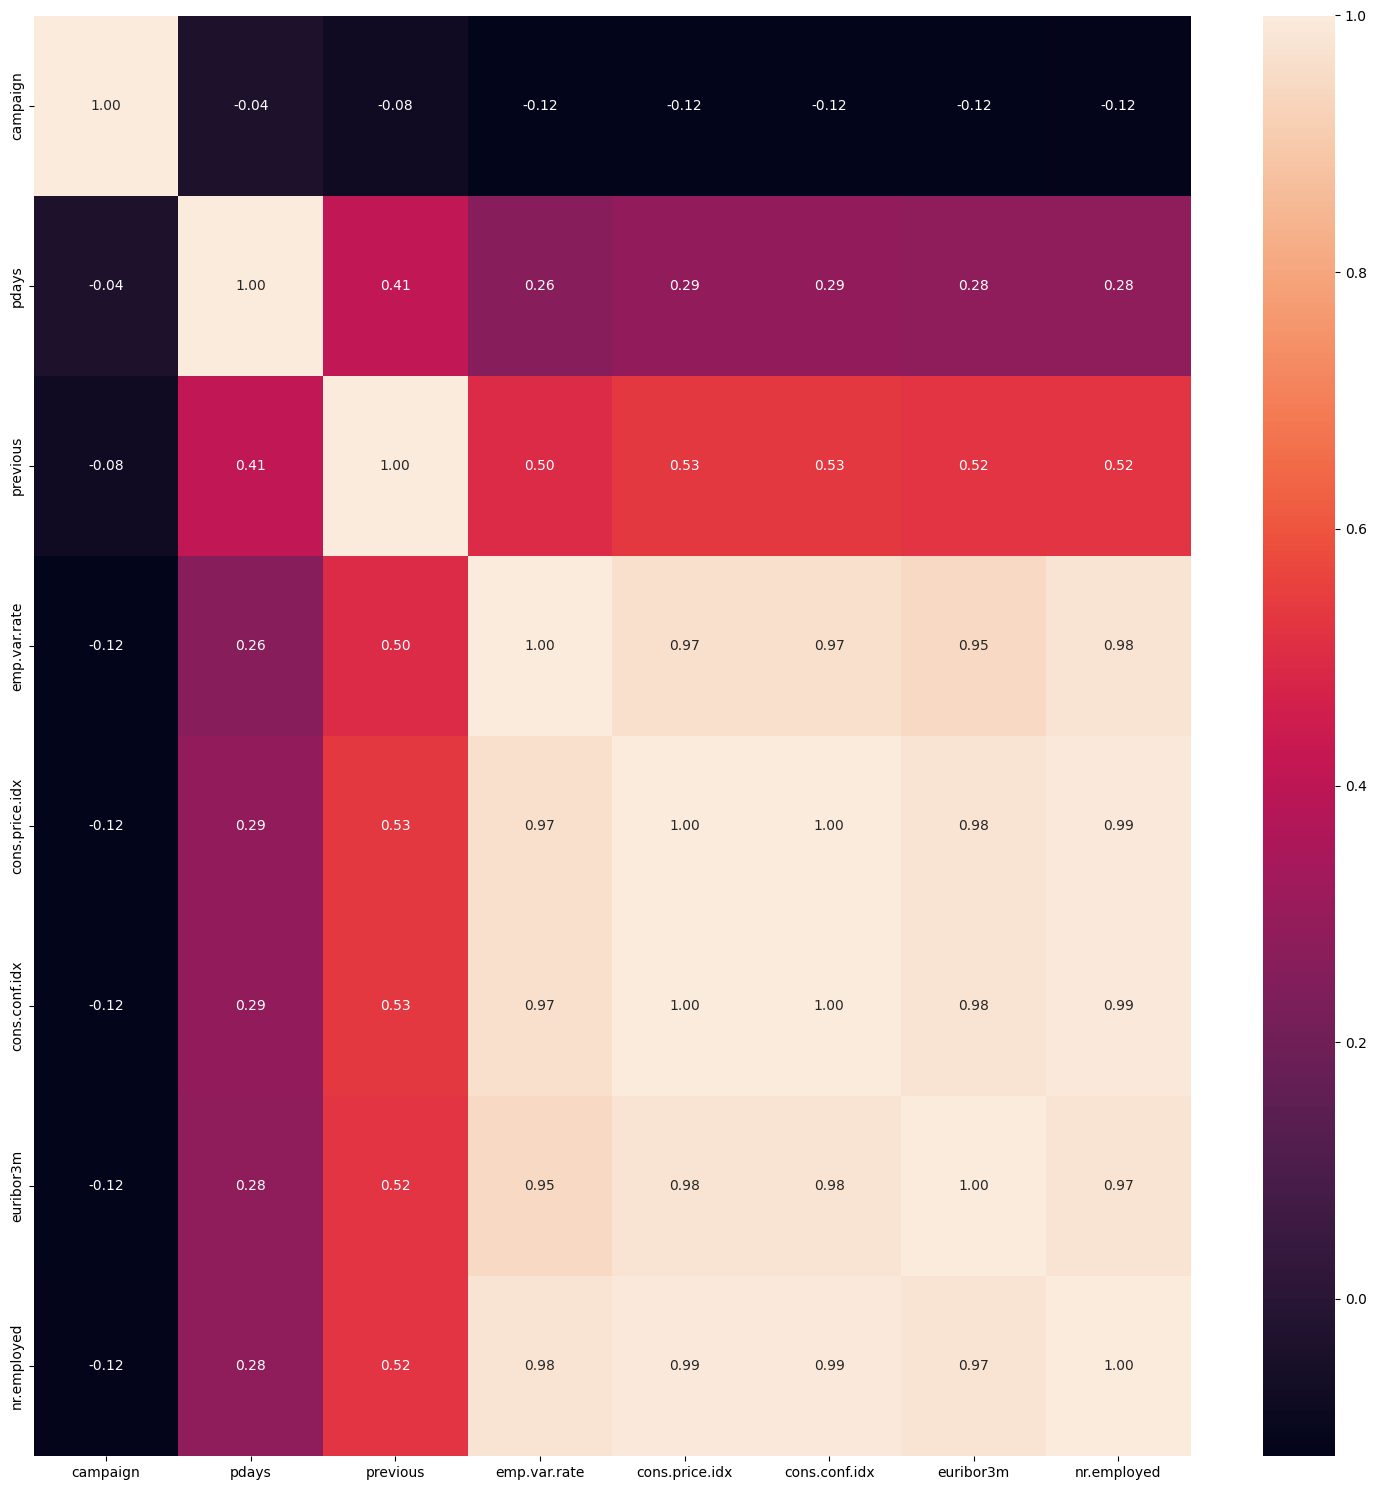

In [41]:

ds["campaign"] = pd.factorize(ds["campaign"])[0]
ds["pdays"] = pd.factorize(ds["pdays"])[0]
ds["previous"] = pd.factorize(ds["previous"])[0]
ds["emp.var.rate"] = pd.factorize(ds["emp.var.rate"])[0]
ds["cons.price.idx"] = pd.factorize(ds["cons.price.idx"])[0]
ds["cons.conf.idx"] = pd.factorize(ds["cons.conf.idx"])[0]
ds["euribor3m"] = pd.factorize(ds["euribor3m"])[0]
ds["nr.employed"] = pd.factorize(ds["nr.employed"])[0]
ds["y_n"] = pd.factorize(ds["y"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(ds[["campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


In [42]:
ds.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024,10.421,17.0,32.0,38.0,47.0,98.0
duration,41188.0,258.285,259.279,0.0,102.0,180.0,319.0,4918.0
campaign,41188.0,1.595,2.958,0.0,0.0,1.0,2.0,41.0
pdays,41188.0,0.188,1.341,0.0,0.0,0.0,0.0,26.0
previous,41188.0,0.173,0.495,0.0,0.0,0.0,0.0,7.0
emp.var.rate,41188.0,2.142,2.082,0.0,1.0,1.0,4.0,9.0
cons.price.idx,41188.0,4.967,5.314,0.0,1.0,3.0,9.0,25.0
cons.conf.idx,41188.0,4.967,5.314,0.0,1.0,3.0,9.0,25.0
euribor3m,41188.0,54.289,64.770,0.0,10.0,20.0,101.0,315.0
nr.employed,41188.0,2.239,2.297,0.0,1.0,1.0,4.0,10.0


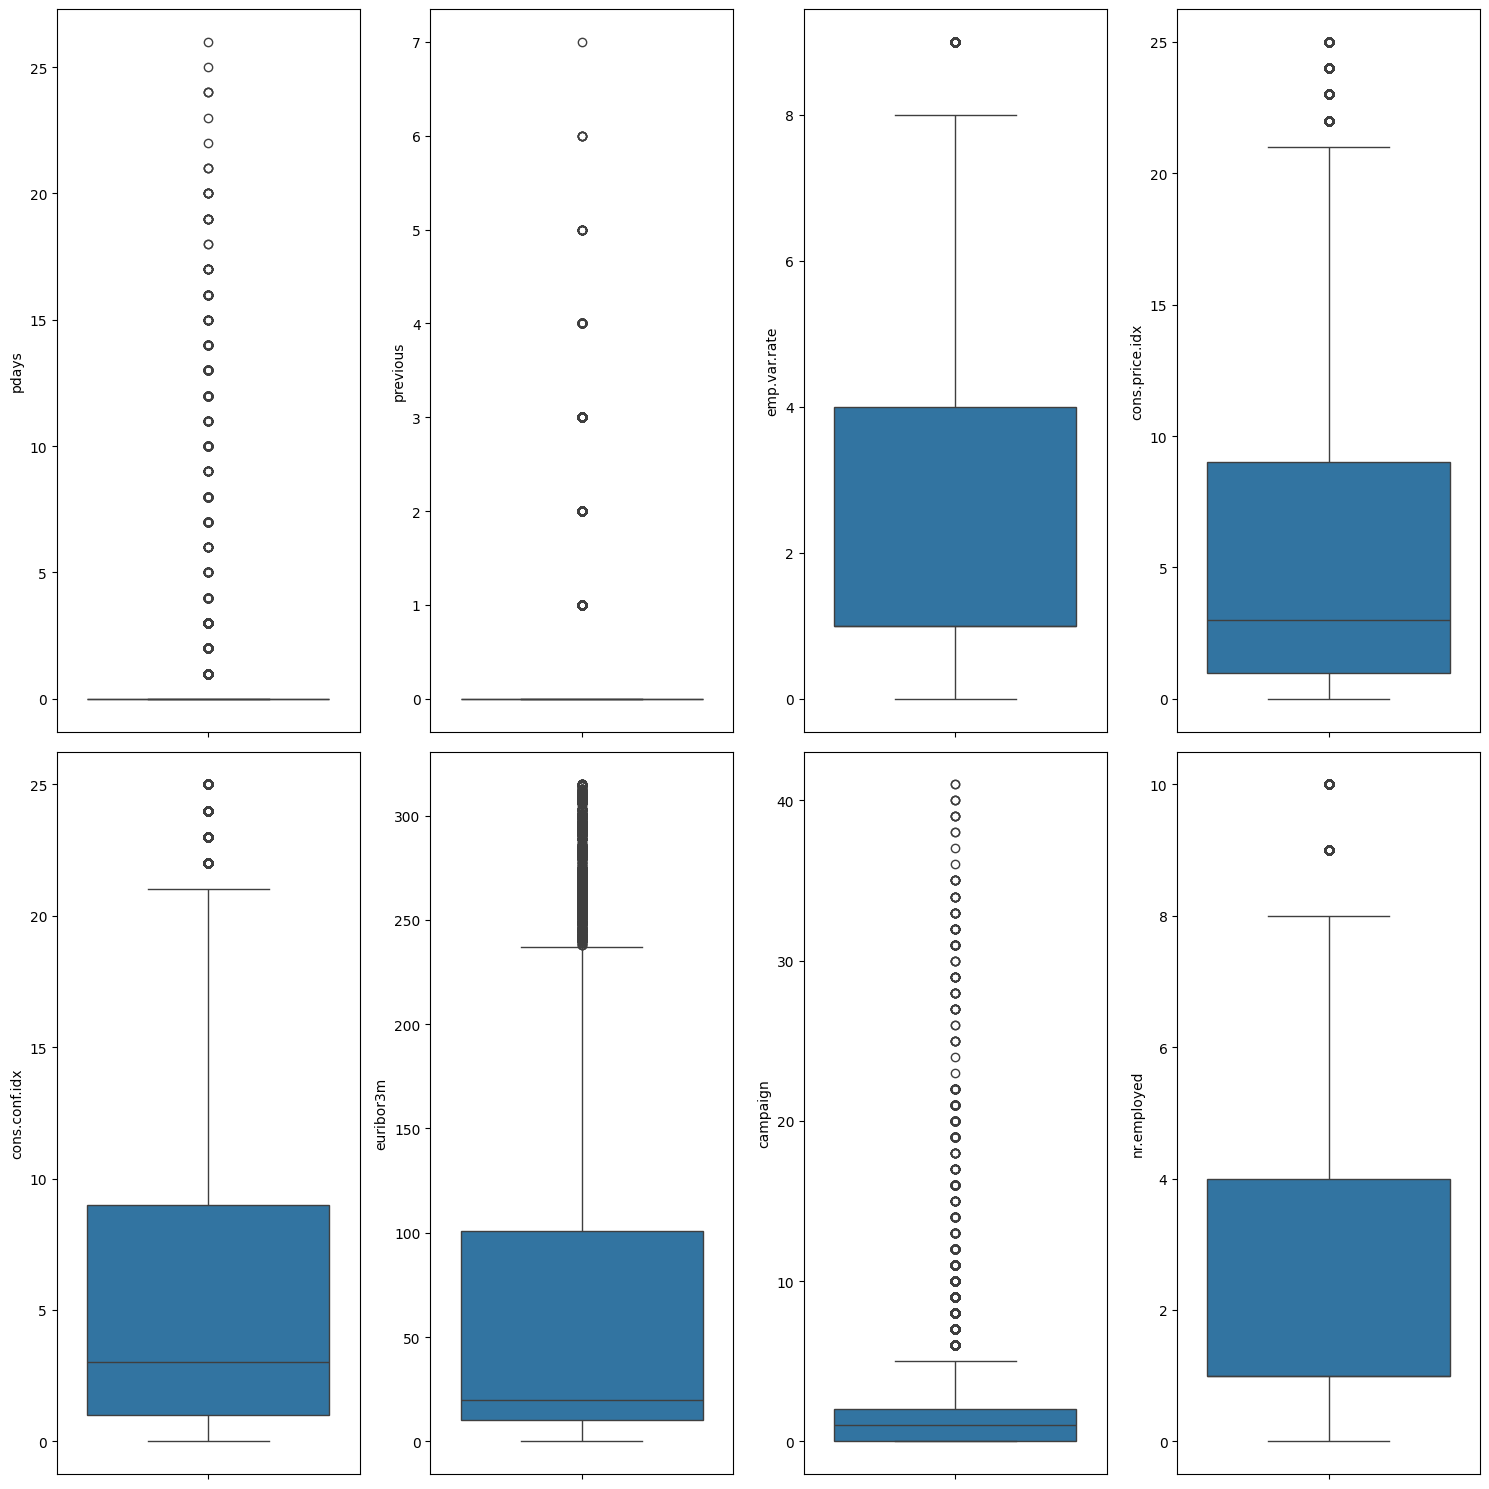

In [32]:
fig, axes = plt.subplots(2, 4, figsize = (15, 15))


sns.boxplot(ax = axes[0, 0], data = ds, y = "pdays")
sns.boxplot(ax = axes[0, 1], data = ds, y = "previous")
sns.boxplot(ax = axes[0, 2], data = ds, y = "emp.var.rate")
sns.boxplot(ax = axes[0, 3], data = ds, y = "cons.price.idx")
sns.boxplot(ax = axes[1, 0], data = ds, y = "cons.conf.idx")
sns.boxplot(ax = axes[1, 1], data = ds, y = "euribor3m")
sns.boxplot(ax = axes[1, 2], data = ds, y = "campaign")
sns.boxplot(ax = axes[1, 3], data = ds, y = "nr.employed")

plt.tight_layout()

plt.show()

In [43]:
num_variables = [ "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(ds[num_variables])
ds_scal = pd.DataFrame(scal_features, index = ds.index, columns = num_variables)
ds_scal

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
41183,0.00000,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
41184,0.00000,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0
41185,0.02439,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0
41186,0.00000,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0


In [44]:
X = ds_scal.drop("y_n", axis = 1)
y = ds_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.666667,0.60,0.60,0.619048,0.6
1,0.111111,0.08,0.08,0.044444,0.1
2,0.444444,0.36,0.36,0.349206,0.4
3,0.000000,0.00,0.00,0.006349,0.0
4,0.000000,0.00,0.00,0.000000,0.0


In [45]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

2. MODELO DE REGRESION LOGÍSTICA

In [46]:
ds_train = pd.read_csv("../data/processed/clean_train.csv")
ds_test = pd.read_csv("../data/processed/clean_test.csv")

ds_train.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.666667,0.60,0.60,0.619048,0.6,1.0
1,0.111111,0.08,0.08,0.044444,0.1,0.0
2,0.444444,0.36,0.36,0.349206,0.4,0.0
3,0.000000,0.00,0.00,0.006349,0.0,0.0
4,0.000000,0.00,0.00,0.000000,0.0,0.0


In [47]:
X_train = ds_train.drop(["y_n"], axis = 1)
y_train = ds_train["y_n"]
X_test = ds_test.drop(["y_n"], axis = 1)
y_test = ds_test["y_n"]

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
accuracy_score(y_test, y_pred)

0.8868657441126487

3.OPTIMIZACIÓN DEL MODELO

In [54]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [56]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.001, 'penalty': None, 'solver': 'lbfgs'}


In [61]:
model_grid = LogisticRegression(penalty = None, C = 0.001, solver = "lbfgs")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8875940762320952

In [63]:
dump(model, open("../models/logistic_regression_C-0.001_penalty-none_solver-lbfgs_42.sav", "wb"))